In [1]:
# Import packages
import matplotlib.pyplot as plt
from looper import *
import pandas as pd
import numpy as np
% matplotlib inline

In [2]:
import plotly
print plotly.__version__            # version 1.9.4 required
plotly.offline.init_notebook_mode() # run at the start of every notebook

import plotly.plotly as py
import plotly.graph_objs as go


1.9.10


In [3]:
input_csv = './live_mouse_data.csv'

# Read input dataset
df_input = pd.read_csv(input_csv, header=None)
df_input.head()

0      1    2             3            4     5     6            7    \
0  Status  Mouse  DPI        pd log           PD   RBC  TEMP       WEIGHT   
1       1    3.3    0            -5            0  8.12  38.1          100   
2       1    3.3    1   -3.78885275     1.63E-04  8.12  38.3  96.08269859   
3       1    3.3    2  -3.720152898     1.90E-04  8.04  38.2   94.3960827   
4       1    3.3    3  -2.954495907  0.001110463  8.51  38.4   94.9945593   

          8             9       ...               100           101  \
0     adipor1          aqp9     ...               ngp         p2rx1   
1  0.32922268   0.043758392     ...       -0.44742823  -0.097622395   
2  0.31752968  -0.033120155     ...       -0.18969107   0.049849987   
3   0.4401703    0.28692913     ...       -0.29127264    0.37199068   
4  0.26937866    0.20083714     ...       -0.11288023    0.08213091   

            102          103         104         105          106  \
0         p2rx1         saa3     chchd10      chi3l3       chi3l3   
1  -0.032001495   -0.1508069  0.32435894   0.4194379    -2.86E-04   
2    0.20644379  -0.13659334   0.5117712  0.37867498     2.86E-04   
3    0.22624207  -0.10158014  0.48682976   0.5203147  -0.71136475   
4    0.18935204  0.096823215  0.20591927  0.31991434   0.36161613   

            107          108          109  
0        chi3l3         lcn2        stfa1  
1      0.231318  -0.17073202   0.03917694  
2  -0.001075268  0.057540417  -0.07583523  
3     0.5874419   0.30123758   0.45473576  
4    0.39161634    1.4285026    0.3069849  

[5 rows x 110 columns]

In [6]:
# Transpose and massage input dataset
df_massaged = df_input
df_massaged.columns = df_massaged.ix[0,:]
df_massaged.drop(0,axis=0,inplace=True)
df_massaged.reset_index(inplace=True, drop=True)

# Remove columns that are all NaNs
df_massaged.dropna(how='all', axis=1, inplace=True)

df_massaged.head()

0 Status Mouse DPI        pd log           PD   RBC  TEMP       WEIGHT  \
0      1   3.3   0            -5            0  8.12  38.1          100   
1      1   3.3   1   -3.78885275     1.63E-04  8.12  38.3  96.08269859   
2      1   3.3   2  -3.720152898     1.90E-04  8.04  38.2   94.3960827   
3      1   3.3   3  -2.954495907  0.001110463  8.51  38.4   94.9945593   
4      1   3.3   4  -2.230728232  0.005878571  7.73  37.9   95.7562568   

0     adipor1          aqp9     ...               ngp         p2rx1  \
0  0.32922268   0.043758392     ...       -0.44742823  -0.097622395   
1  0.31752968  -0.033120155     ...       -0.18969107   0.049849987   
2   0.4401703    0.28692913     ...       -0.29127264    0.37199068   
3  0.26937866    0.20083714     ...       -0.11288023    0.08213091   
4  0.02646923   -0.13312912     ...       -0.24478292  -0.015872478   

0         p2rx1         saa3       chchd10      chi3l3       chi3l3  \
0  -0.032001495   -0.1508069    0.32435894   0.4194379    -2.86E-04   
1    0.20644379  -0.13659334     0.5117712  0.37867498     2.86E-04   
2    0.22624207  -0.10158014    0.48682976   0.5203147  -0.71136475   
3    0.18935204  0.096823215    0.20591927  0.31991434   0.36161613   
4   -0.00554657  0.009473324  -0.033929825  0.69505835   0.23386288   

0        chi3l3         lcn2        stfa1  
0      0.231318  -0.17073202   0.03917694  
1  -0.001075268  0.057540417  -0.07583523  
2     0.5874419   0.30123758   0.45473576  
3    0.39161634    1.4285026    0.3069849  
4    0.45934534    0.5938859   0.21554375  

[5 rows x 110 columns]

In [7]:
df_massaged = df_massaged.drop(df_massaged.columns[0],axis=1)
df_massaged=df_massaged.rename(columns = {'DPI':'Time'})
df_massaged.head()

0 Mouse Time        pd log           PD   RBC  TEMP       WEIGHT     adipor1  \
0   3.3    0            -5            0  8.12  38.1          100  0.32922268   
1   3.3    1   -3.78885275     1.63E-04  8.12  38.3  96.08269859  0.31752968   
2   3.3    2  -3.720152898     1.90E-04  8.04  38.2   94.3960827   0.4401703   
3   3.3    3  -2.954495907  0.001110463  8.51  38.4   94.9945593  0.26937866   
4   3.3    4  -2.230728232  0.005878571  7.73  37.9   95.7562568  0.02646923   

0          aqp9        bnip3l     ...               ngp         p2rx1  \
0   0.043758392   0.121614456     ...       -0.44742823  -0.097622395   
1  -0.033120155    0.23787594     ...       -0.18969107   0.049849987   
2    0.28692913    0.21776676     ...       -0.29127264    0.37199068   
3    0.20083714    0.06855297     ...       -0.11288023    0.08213091   
4   -0.13312912  -0.020170212     ...       -0.24478292  -0.015872478   

0         p2rx1         saa3       chchd10      chi3l3       chi3l3  \
0  -0.032001495   -0.1508069    0.32435894   0.4194379    -2.86E-04   
1    0.20644379  -0.13659334     0.5117712  0.37867498     2.86E-04   
2    0.22624207  -0.10158014    0.48682976   0.5203147  -0.71136475   
3    0.18935204  0.096823215    0.20591927  0.31991434   0.36161613   
4   -0.00554657  0.009473324  -0.033929825  0.69505835   0.23386288   

0        chi3l3         lcn2        stfa1  
0      0.231318  -0.17073202   0.03917694  
1  -0.001075268  0.057540417  -0.07583523  
2     0.5874419   0.30123758   0.45473576  
3    0.39161634    1.4285026    0.3069849  
4    0.45934534    0.5938859   0.21554375  

[5 rows x 109 columns]

In [23]:
df_massaged.Time = df_massaged.Time.astype(int)
df_massaged.Mouse = df_massaged.Mouse.astype(float)

In [24]:
for time_pt in df_massaged.Time.unique():
    print "Timept: {}, # of entries: {}".format(time_pt, df_massaged.query("Time=={}".format(time_pt)).shape[0])

Timept: 0, # of entries: 3
Timept: 1, # of entries: 3
Timept: 2, # of entries: 3
Timept: 3, # of entries: 3
Timept: 4, # of entries: 3
Timept: 5, # of entries: 3
Timept: 6, # of entries: 3
Timept: 7, # of entries: 3
Timept: 8, # of entries: 3
Timept: 9, # of entries: 3
Timept: 10, # of entries: 3
Timept: 11, # of entries: 3
Timept: 12, # of entries: 3
Timept: 13, # of entries: 3
Timept: 14, # of entries: 3
Timept: 16, # of entries: 3
Timept: 17, # of entries: 3
Timept: 18, # of entries: 3
Timept: 19, # of entries: 3
Timept: 20, # of entries: 3
Timept: 21, # of entries: 3
Timept: 22, # of entries: 3
Timept: 23, # of entries: 3
Timept: 24, # of entries: 3
Timept: 25, # of entries: 3


In [234]:
all_indiv = filter_to_unique_genes(df_massaged) # Not needed in this case since all genes are unique
# all_indiv = df_massaged

109


In [238]:
training_data = all_indiv.query("Time<=18 and Mouse==3.3")
test_data = all_indiv.query("Time<=18 and Mouse!=3.3")

In [239]:
training_data.shape

(18, 79)

In [248]:
# Create a composite individual
training_data.drop(['Mouse'],axis=1,inplace=True)
df_composite, df_composite_scaled = create_composite_profile(training_data, 'Time', [], True, time_pt_zero = 0) 
#all_indiv has been replaced with training_data

/Users/PoonamRath/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [249]:
print df_composite_scaled['TEMP']

0       0
1     0.2
2     0.1
3     0.3
4    -0.2
5     0.2
6     0.2
7     0.3
8    -2.5
9    -3.8
10   -6.3
11   -4.3
12     -2
13   -0.7
14    0.2
15    0.1
16      0
17   -0.3
Name: TEMP, dtype: object


In [250]:
### PHASE-SHIFTED GENES From here

In [251]:
# In this case, we use the given features and don't select for large-ranged genes
#large_ranged_genes = get_large_ranged_genes(df_composite_scaled, prctile=0.5)
# large_ranged_genes = df_composite_scaled.columns
# print len(large_ranged_genes)

In [252]:
help(get_phase_shifted_genes)

Help on function get_phase_shifted_genes in module looper:

get_phase_shifted_genes(df, PROXIMITY=5, CUTOFF=0.5, override_offset=False, outside_offset=1)



In [253]:
psgenes_dict = get_phase_shifted_genes(df_composite, CUTOFF=2, override_offset=True, outside_offset=8)
psgenes_dict

Time  pd log  PD  RBC  TEMP  WEIGHT  adipor1  aqp9  bnip3l  fech  hbq1  immp2l  rnf10  slc25a37  slc25a39  hp  lat  retnlg  s100a8  s100a9  slpi  epb4  fbxo9  glrx5  hebp1  ssbp3  trim10  2010001m09rik  cd3d  cd79b  cmtm6  dok3  faim3  fcrla  klhl6  lck  prkacb  sell  selplg  snn  syvn1  thy1  abcb4  ank1  bc021614  ctse  mgst3  mllt3  mta3  pkig  ppox  ranbp10  rhag  trak2  urod  xpo7  ccl5  flot2  hdc  id2  nkg7  sh2d2a  1100001g20rik  camp  cd177  chi3l1  f2rl2  hcst  ltb4r1  ltf  mrgpra2  ngp  p2rx1  saa3  chchd10  chi3l3  lcn2  stfa1 

{'1100001g20rik': ['bc021614', 'mgst3', 'chchd10'],
 '2010001m09rik': ['s100a8'],
 'PD': ['adipor1',
  'bnip3l',
  'fech',
  'hbq1',
  'immp2l',
  'rnf10',
  'slc25a37',
  'glrx5'],
 'TEMP': ['PD'],
 'abcb4': ['p2rx1'],
 'adipor1': ['PD',
  'lat',
  's100a8',
  's100a9',
  'slpi',
  'cmtm6',
  'dok3',
  'klhl6',
  'lck',
  'prkacb',
  'sell',
  'selplg',
  'hdc',
  'id2',
  '1100001g20rik',
  'chi3l1',
  'f2rl2',
  'mrgpra2',
  'p2rx1',
  'chi3l3'],
 'ank1': ['1100001g20rik', 'cd177', 'f2rl2', 'p2rx1'],
 'aqp9': ['PD',
  'hp',
  'lat',
  'retnlg',
  's100a8',
  's100a9',
  'slpi',
  'cmtm6',
  'dok3',
  'klhl6',
  'lck',
  'prkacb',
  'sell',
  'selplg',
  'syvn1',
  'ppox',
  'hdc',
  'id2',
  'sh2d2a',
  '1100001g20rik',
  'cd177',
  'chi3l1',
  'f2rl2',
  'ltb4r1',
  'mrgpra2',
  'p2rx1',
  'saa3',
  'chi3l3',
  'lcn2',
  'stfa1'],
 'bnip3l': ['PD',
  'lat',
  's100a8',
  's100a9',
  'slpi',
  'cmtm6',
  'dok3',
  'klhl6',
  'lck',
  'prkacb',
  'sell',
  'selplg',
  'hdc',
  'id2',

In [237]:
# for gene1 in psgenes_dict.keys():
geneAs = ['nkg7'] #,'KMO','CXCL3','IL6','MAMLD1','CCL4']
traces = []
for gene1 in geneAs:#psgenes_dict.keys():
    for gene2 in psgenes_dict[gene1]:
        xdata = df_composite_scaled[gene1]
        ydata = df_composite_scaled[gene2]
        traces.append(go.Scatter(x=xdata, y=ydata, mode='lines+markers', name='{}:{}'.format(gene1,gene2)))

plotly.offline.iplot(traces)

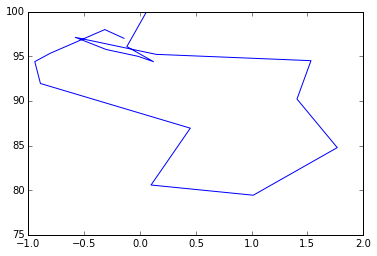

In [265]:
%matplotlib inline
x = df_composite['Time']
y = df_composite
plt.plot(y['nkg7'],y['WEIGHT'])
# plt.plot(x,y)
# plt.plot(x,df_composite['Fech'])
# plt.plot(x,df_composite['Serpina3g'])
plt.show()

In [ ]:
# Export data for selected genes to separate CSVs
merge_lists = lambda lst_a, lst_b: list(set(lst_a).union(set(lst_b)))
cols_for_export = merge_lists(psgenes_dict.keys(),['Time'])
for lst in psgenes_dict.values():
    cols_for_export = merge_lists(cols_for_export, lst)

training_data.ix[:,cols_for_export].to_csv("mouse_malaria_exported_data_training.csv", index=False)
test_data.ix[:,cols_for_export].to_csv("mouse_malaria_exported_data_test.csv", index=False)
#test_data.to_csv("human_monocyte_exported_data_test.csv")

In [ ]:
def compute_distance(pt1, pt2):
    # Assuming that these pts. are lists of 2 numbers each
    dist = np.sqrt((pt1[0] - pt2[0])**2  +  (pt1[1] - pt2[1])**2)
    return dist

# For each individual's biggest gene pair loops, measure and report accuracy
def predict_accuracy(training_data, test_data, cols, verbose=False):
    K = 3 # Used to control number of neighbors used

    df1 = test_data
    df2 = training_data

    distances = {}
    mode_time = {}
    pred_list = []

    for ii in df1.index:
        pt1 = df1.ix[ii,cols].values
        dist_list = []
        # Compute distances to all training data
        for jj in df2.index:
            pt2 = df2.ix[jj,cols].values
            dist = compute_distance(pt1, pt2)
            # print 'Distance between {} and {}: {}'.format(pt1, pt2, dist)
            dist_list.append((jj, dist))

        distances[ii] = dist_list

        # Find the K nearest neighbors (set 3 since there are 3 different people in the training dataset)
        knn = list(zip(*sorted(dist_list, key = lambda row: row[1])[:K])[0])
        time_pts_for_knn = np.median(df2.ix[knn,'Time'].values)
        mode_time[ii] = time_pts_for_knn
        
    acc_count = 0
    time_acc_count = 0
    for ii in mode_time.keys():
        time_actual = test_data.ix[ii,'Time']
        time_pred = mode_time[ii]
        if verbose==True:
            print '{},{}'.format(time_actual, time_pred)
        pred_list.append(time_pred)
        if time_actual==time_pred:
            time_acc_count += 1
            
    return float(acc_count)/len(mode_time.keys()), float(time_acc_count)/len(mode_time.keys()), pred_list

In [ ]:
def predict_accuracy_for_single_gene(training_data, test_data, gene, verbose='False'):
    K = 3
    df1 = test_data
    df2 = training_data
    
    distances = {}
    mode_time = {}
    pred_list = []

    for ii in df1.index:
        pt1 = df1.ix[ii,gene]
        dist_list = []
        # Compute distances to all training data
        for jj in df2.index:
            pt2 = df2.ix[jj,gene]
            dist = abs(pt2-pt1)
            # print 'Distance between {} and {}: {}'.format(pt1, pt2, dist)
            dist_list.append((jj, dist))

        distances[ii] = dist_list

        # Find the K nearest neighbors (set 3 since there are 3 different people in the training dataset)
        knn = list(zip(*sorted(dist_list, key = lambda row: row[1])[:K])[0])
        time_pts_for_knn = np.median(df2.ix[knn,'Time'].values)
        mode_time[ii] = time_pts_for_knn
        
    acc_count = 0
    time_acc_count = 0
    for ii in mode_time.keys():
        time_actual = test_data.ix[ii,'Time']
        time_pred = mode_time[ii]
        if verbose==True:
            print '{},{}'.format(time_actual, time_pred)
        pred_list.append(time_pred)
        if time_actual==time_pred:
            time_acc_count += 1
        else:
            print 'Actual, Predicted: {},{}'.format(time_actual, time_pred)
            
    return float(acc_count)/len(mode_time.keys()), float(time_acc_count)/len(mode_time.keys()), pred_list

In [ ]:
# Compute accuracy on test data for each single gene using training data
gene_accuracy = pd.DataFrame(columns=['Gene','Accuracy'])
picked_acc_samples = []

for pair in gene_pairs:
    _, time_acc, pred_list = predict_accuracy_for_single_gene(training_data, test_data, pair[0])
    print 'For gene: {}, time accuracy: {}'.format(pair[0], time_acc)
    gene_accuracy.loc[len(gene_accuracy),:] = (pair[0], time_acc)
    picked_acc_samples.append(time_acc)
    
    _, time_acc, pred_list = predict_accuracy_for_single_gene(training_data, test_data, pair[1])
    print 'For gene: {}, time accuracy: {}'.format(pair[1], time_acc)
    gene_accuracy.loc[len(gene_accuracy),:] = (pair[1], time_acc)
    picked_acc_samples.append(time_acc)

In [ ]:
gene_pair_accuracy = pd.DataFrame(columns=['Gene_1','Gene_2','Accuracy'])

picked_acc_samples = []

# Compute accuracy on test data for each gene pair using training data
for pair in gene_pairs:
    _, time_acc, pred_list = predict_accuracy(training_data, test_data, list(pair))
    print 'For pair: {}, time accuracy: {}'.format(pair, time_acc)
    gene_pair_accuracy.loc[len(gene_pair_accuracy),:] = (pair[0], pair[1], time_acc)
    picked_acc_samples.append(time_acc)

In [ ]:
# Randomized gene pair - baseline
random_gene_pairs = []
num_of_pairs = 50

for ii in range(0, num_of_pairs):
    idx_1 = int(np.random.rand()*training_data.shape[1])
    idx_2 = int(np.random.rand()*training_data.shape[1])
    random_gene_pairs.append((training_data.columns[idx_1], training_data.columns[idx_2]))

In [ ]:
time_acc_samples = []
for pair in random_gene_pairs:
    _, time_acc, pred_list = predict_accuracy(training_data, test_data, list(pair))
    print 'For pair: {}, time accuracy: {}'.format(pair, time_acc)
    time_acc_samples.append(time_acc)

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.set_context("talk")
# with plt.style.context("fivethirtyeight"):
# #     sns.distplot(picked_acc_samples, bins=20)
_, c2, c3 = sns.color_palette("Set1", 3)
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
# sns.despine()
sns.kdeplot(np.array(time_acc_samples), shade=True, c=c2)
sns.kdeplot(np.array(picked_acc_samples), shade=True, c=c3)
plt.show()

In [ ]:
from scipy.stats import ks_2samp
KSstat, KS_p_value = ks_2samp(time_acc_samples, picked_acc_samples)
print KSstat, KS_p_value